# STAT207 Mini-Project #1 - INSERT TITLE HERE


Roqaya Elmenshawy

**Delete this code block before submitting**

You should delete and add cells as you see fit.

Don't forget to put written text in **markdown** cells. To change a cell from a <u>code block</u> to a <u>markdown cell</u>:
* Click on the cell you'd like to modify.
* Go to 'Cell' at the top of the page.
* Go to 'Cell Type' in the drop down menu and click on either 'Code' or 'Markdown'.


In [398]:
#Imports here
import pandas as pd                    
import matplotlib.pyplot as plt        
import seaborn as sns                 
sns.set()  

## 1. Introduction

The research question that I intend to answer in the report is "How does the nature of the relationship between Ram GB and Price (Price_euros) change for different values of Operation Systems (OpSys) in the dataset?". The motivation for why I am seeking to answer this particular research question is because being a data science major interested in technology, I am interested to see how factors like operation systems and amount of Ram GB affect price. I've always had an interest in buying the newest technology and evaluating it, but it tends to be expensive, and I wanted to learn what factors can change the pattern of price in technology like computers. My guess is that the higher the Ram GB, the higher the price (positive linear relationship), because having more storage is valuable and costs more to install in a device, making the price higher, but I want to learn how different kinds of operation systems change that behavior. One type of person who may find the answers to this research question useful is a software engineer manufacturing a new laptop that will come out in the market. He might USE the answers to this research question to determine what operation system and Ram GB to have in the new laptop in order to have a reasonable price for a valuable product, that people are actually willing to buy with that price.

## 2. Dataset Discussion

In [399]:
df = pd.read_csv('laptop_price.csv')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram GB,Memory,Gpu,OpSys,Weight kg,Price_euros
0,1,Apple,Mac OSBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,Mac OS,1.37,1339.69
1,2,Apple,Mac OSbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,Mac OS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,Other,1.86,575.00
3,4,Apple,Mac OSBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,Mac OS,1.83,2537.45
4,5,Apple,Mac OSBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,Mac OS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,Windows,1.80,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows,1.30,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,Windows,1.50,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows,2.19,764.00


I am selecting only the 3 variables I would like to observe.

In [400]:
df = pd.read_csv('laptop_price.csv')[['Ram GB', 'Price_euros', 'OpSys']]
df.head()

,Ram GB,Price_euros,OpSys
0,8,1339.69,Mac OS
1,8,898.94,Mac OS
2,8,575.00,Other
3,16,2537.45,Mac OS
4,8,1803.60,Mac OS


In [401]:
df.shape[0]

1303

I found this dataset in Kaggle when I looked up "Laptop Prices". Here is the link for the dataset: https://www.kaggle.com/datasets/muhammetvarl/laptop-price/data . I downloded this file on Thursday, February 20th. The rows in this dataset represent each laptop, based on its laptop ID. This dataset was created by data collected by Muhammet Varlı, a Kaggle contributor, but he doesn't say how he got that data and where he collected it from. This dataset is not necessarily inclusive of all possible types of observations related to laptop prices. There are several types of observations that might be missing: Battery life, Build material (e.g., aluminum, plastic), Cooling system (e.g., active vs. passive cooling), Pre-installed software (e.g., Microsoft Office, antivirus programs), Warranty period and service options, Security features (e.g., fingerprint scanner, TPM chip), Number and type of USB ports (USB-A, USB-C, Thunderbolt), Bluetooth version and Availability of Ethernet, HDMI, or SD card slots. These observations do contribute to the value of the laptop itself and can definitely have an association with the price. Knowing that there are some valuable observations that aren't in this dataset, this will impact the types of actions that the software engineer building a new laptop in my research motivation might take, such as doing more research and paying attention to patterns related to how such features impact the price of the laptop. If he had these observations, he would know how to move forward right away based on my analysis, but now he has to do more research to decide what features should be implemented to make the laptop valuable without inflating its price way too unreasonably. The three variables I intend to explore in this analysis, are price, Ram GB, and operation system. The price represents how much each laptop is being sold for, which will represent the numerical response variable in my analysis. The Ram is the amount of storage or memory held in the laptop, which I predict will be associated with the price, because the amount of memory is valuable. Random-access memory, or RAM, is one of the most important parts of any computer, which is my numerical explanatory variable that I will be using. It provides high-speed, short-term memory for your computer's CPU. The operating system is a set of special programs that run on a computer system that allows it to work properly. It performs basic tasks such as recognizing input from the keyboard, keeping track of files and directories on the disk, sending output to the display screen and controlling peripheral devices. An operating system can be associated with a computer's price through licensing costs, hardware requirements, and bundled software, with paid OS options like Windows and macOS generally increasing costs compared to free alternatives like Linux. The operation system (OpSys) will serve as our categorical explanatory variable that we are seeing how the relationship between price and Ram changes for different values of.


## 3. Dataset Cleaning

In [402]:
df

,Ram GB,Price_euros,OpSys
0,8,1339.69,Mac OS
1,8,898.94,Mac OS
2,8,575.00,Other
3,16,2537.45,Mac OS
4,8,1803.60,Mac OS
...,...,...,...
1298,4,638.00,Windows
1299,16,1499.00,Windows
1300,2,229.00,Windows
1301,6,764.00,Windows


In [403]:
df.dtypes

Ram GB           int64
Price_euros    float64
OpSys           object
dtype: object

In [404]:
df.isna().sum()

Ram GB         0
Price_euros    0
OpSys          0
dtype: int64

In [405]:
df.shape[0]

1303

In [406]:
df = df.dropna()
df

,Ram GB,Price_euros,OpSys
0,8,1339.69,Mac OS
1,8,898.94,Mac OS
2,8,575.00,Other
3,16,2537.45,Mac OS
4,8,1803.60,Mac OS
...,...,...,...
1298,4,638.00,Windows
1299,16,1499.00,Windows
1300,2,229.00,Windows
1301,6,764.00,Windows


In [407]:
df.shape[0]

1303

There are no implicit or explicit missing values. All the values that are numerical either say float64 or int64 and the string values are object, which we found with df.dtypes. When I did df.isna.sum(), I could tell that there no NaN missing values that are in the default. When I did df.dropna(), no rows were dropped, which means there are no missing values. The df.dropna() pro is that it makes sure to eliminate all rows with missing values. However, it has to be overridden in order to be saved in the dataframe. A con is that it only accounts for the default list of missing values that are in python, so if there are any other missing values we would have to manually add them to our na_values list when reading the csv file. The df.dtypes function is helpful because it shows us that string values are object (OpSys) and numerical values are int64 or float64 (Price_euros and Ram GB), which is good because, for example, if a numerical value shows as an object, we know that there is a missing value out there that we need to spot. The df.dtypes function works very well with the df.dropna() function because it gives us a hint there is a non-default missing value if no rows were dropped after using df.dropna(). A con of the df.dtypes is that it just won't explicitly tell us what the non-default missing value is, so we have to find out manually on our own.

In [408]:
df['OpSys'].value_counts()

OpSys
Windows    1118
Other       164
Mac OS       21
Name: count, dtype: int64

every DISTINCT VALUE of the categorical variable OpSys (operation system) has AT LEAST 10 observations in the dataset that correspond to it.

In [409]:
df[['Price_euros','Ram GB']].corr()

,Price_euros,Ram GB
Price_euros,1.000000,0.743007
Ram GB,0.743007,1.000000


In the boxplot below, for Ram GB, we could see that there are a few outliers, with values over 15 GB for the laptop. A pro of dropping these outliers would help eliminate a possible right skew in the data. Dropping these outliers will make our data a more accurate representation of the normal range of Ram GB in laptops. If I were to not clean our dataset of potential outliers, my correlation calculations might be inflated. The presence of the outliers may yield a higher correlation value that may make the strength of the relationship (of the other observations) look stronger than what they really are. Also, if I were to have a linear regression model, it may skew towards some of these outliers at the expense of the fit of the bulk of the remaining non-outlier observations. However, I may not want to clean the outliers from the dataset because my dataset (and thus its resulting model) would no longer be as representative of the original dataset (which is all laptops). A con of dropping these outliers will be eliminating data that is rare, but could be important because it is real and should be paid attention to. It raises questions to why a specific computer has more Ram GB than most other computers. I am choosing to drop only the EXTREME outliers, and keep the rest. I ended up dropping 18 rows.

In [410]:
initialLen = df.shape[0]
initialLen

1303

<Axes: ylabel='Ram GB'>

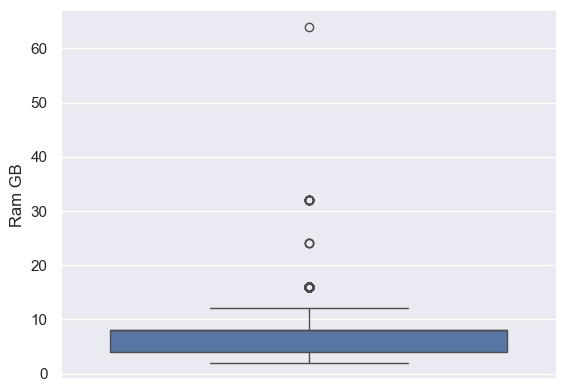

In [411]:
sns.boxplot(df['Ram GB'])

In [412]:
df = df[df['Ram GB']<= 25]
finalLen = df.shape[0]
finalLen

1285

In [413]:
initialLen - finalLen

18

In the boxplot below, for Price_euros, we could see that there are many outliers, with prices over 2800 euros for the laptops. A pro of dropping these outliers would help eliminate a possible right skew in the data. Dropping these outliers will make our data a more accurate representation of the normal range of Ram GB in laptops. If I were to not clean our dataset of potential outliers, my correlation calculations might be inflated. The presence of the outliers may yield a higher correlation value that may make the strength of the relationship (of the other observations) look stronger than what they really are. Also, if I were to have a linear regression model, it may skew towards some of these outliers at the expense of the fit of the bulk of the remaining non-outlier observations. However, I may not want to clean the outliers from the dataset because my dataset (and thus its resulting model) would no longer be as representative of the original dataset (which is all laptops). A con of dropping these outliers will be eliminating data that is rare, but could be important because it is real and should be paid attention to. It raises questions to why a specific computer has is priced much higher than most other computers. I am choosing to drop only the EXTREME outliers, and keep the rest. I ended up dropping 4 more rows. The total number of rows dropped from outliers from numerical variables so far is 22 rows. Before dropping the outliers, our correlation coefficient was 0.74 and after dropping outliers, it became 0.71. This shows that the outliers did inflate our correlation coefficient, but not significantly.

In [414]:
initialLen2 = df.shape[0]
initialLen2

1285

<Axes: ylabel='Price_euros'>

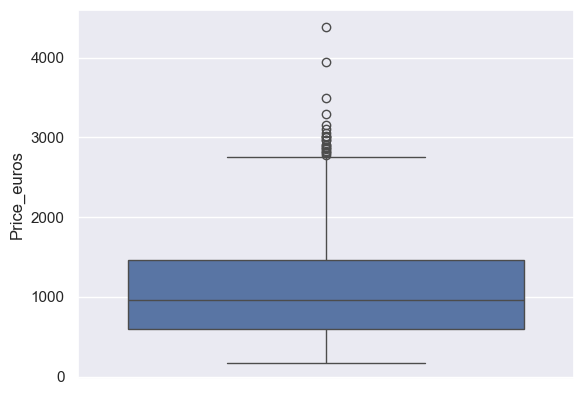

In [415]:
sns.boxplot(df['Price_euros'])

In [416]:
df = df[df['Price_euros']<= 3250]
finalLen2 = df.shape[0]
finalLen2

1281

In [417]:
initialLen2 - finalLen2

4

In [418]:
initialLen-finalLen2

22

In [419]:
df[['Price_euros','Ram GB']].corr()

,Price_euros,Ram GB
Price_euros,1.000000,0.718936
Ram GB,0.718936,1.000000


In the scatterplot below, I graphed the relationship between Price_euros vs Ram GB, which are my two numerical variables. I could see what appears to be 3 high outliers, that are about 23 GB, and they are farther from the rest of the data. A pro of eliminating these outliers is that dropping outliers can improve the fit of a linear regression model, if we were to make one.  These outliers can disproportionately influence the slope and intercept of our best fit line, leading to a model that doesn't accurately represent the relationship between Price_model and Ram GB for the majority of the data points. Removing them can result in a better-fitting line and more reliable representation for typical data points. However, like I previously said, a con of dropping outliers is that it can lead to a loss of information. These outliers might represent genuine data points that are unusual but still important. Removing them might bias the analysis and prevent the discovery of important insights or subgroups within the data. It's crucial to understand why the outliers exist before removing them, so I might want to know the reason why these laptops specifically have such high Ram GBs and why they have a price disparity. They might indicate errors in data collection or a different underlying process that should be investigated further. I chose to drop the outliers. I dropped 3 additional rows. After removing ALL outliers from the boxplots and the scatterplot, I dropped 25 rows total.

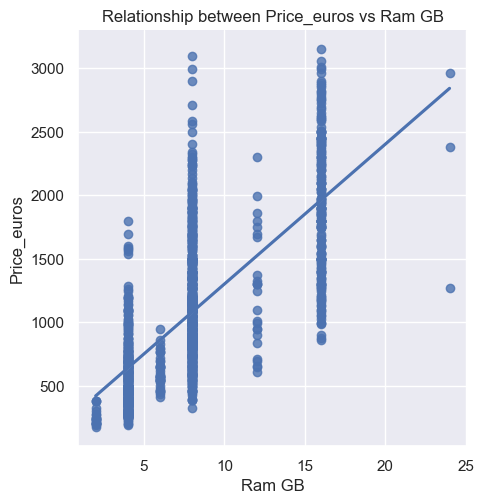

In [420]:
sns.lmplot(x='Ram GB',y='Price_euros', data=df, ci=False)
plt.title('Relationship between Price_euros vs Ram GB')
plt.show()

In [421]:
initialLen3 = df.shape[0]
initialLen3

1281

In [422]:
df = df[df['Ram GB']< 23]
finalLen3 = df.shape[0]
finalLen3

1278

In [423]:
initialLen3-finalLen3

3

In [424]:
initialLen-finalLen3

25

In [425]:
df[['Price_euros','Ram GB']].corr()

,Price_euros,Ram GB
Price_euros,1.00000,0.71923
Ram GB,0.71923,1.00000


I don't believe there is other data cleaning I have to do. Everything seems to make sense so far, and the correlation coefficient did drop after removing the outlier, so my prediction of the outliers causing correlation coefficient inflation was correct.

## 4. <u>Research Question</u>: How does the Relationship between RAM (Ram GB) and Price of a laptop (Price_euros) Change based on Different Values of Operation Systems (OpSys) in the Dataset?

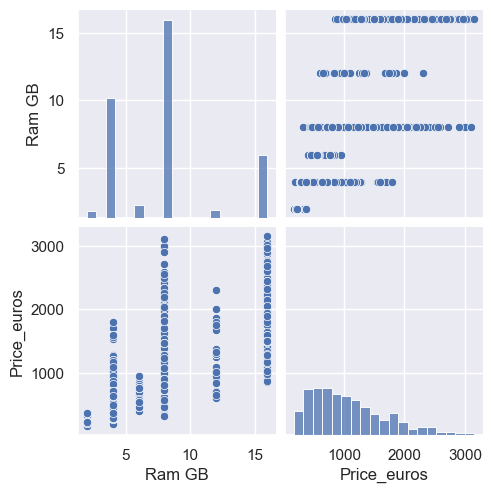

In [426]:
sns.pairplot(df)
plt.show()

In [427]:
df[['Price_euros','Ram GB']].corr()

,Price_euros,Ram GB
Price_euros,1.00000,0.71923
Ram GB,0.71923,1.00000


These are the findings from our scatterplot below:

1. Direction changes: the relationship between Price_euros and Ram GB is postive for all 3 OpSys (operation systems).

2. Shape changes: the shape of the relationship between Price_euros and Ram GB are both linear for all 3 OpSys (operation systems).

3. Strength changes: the strength of the relationship between Price_euros and Ram GB is higher for Mac OS than for Windows and Other operation systems.

4. Outliers difference: there are some outliers for all 3 OpSys (operation systems), but more for Windows than the Mac OS and Other operation systems.

5. Slope changes: the slope of the relationship between Price_euros and Ram GB for Mac OS higher/steeper than it is for Windows and Other operation systems.

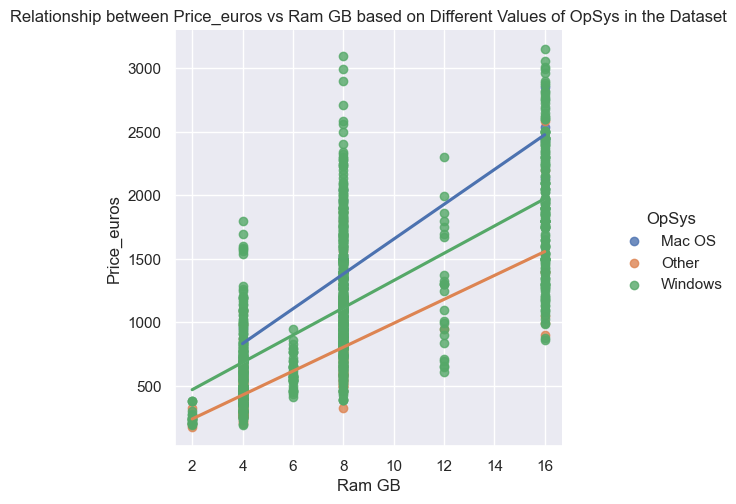

In [428]:
sns.lmplot(x='Ram GB',y='Price_euros', hue='OpSys', ci=False, data=df)
plt.title('Relationship between Price_euros vs Ram GB based on Different Values of OpSys in the Dataset')
plt.show()

I graphed a boxplot showing Ram GB as a categorical variable to see the data more clear for Mac OS and Other operation systems, because it was difficult to see the data points for them due to the concentration of the data points for Windows on the same x-values of Ram GB. This way, I can gain more insights and see the data more clearly for Other operation systems and Mac OS.

In order to thoroughly answer the question "How does the Relationship between RAM (Ram GB) and Price of a laptop (Price_euros) Change based on Different Values of Operation Systems (OpSys) in the Dataset?", we must look at these insights:

1. Shape Differences change: The box plots for each operating system (Windows, Other, Mac OS) and RAM size show varying shapes. Some are roughly symmetrical, while others are skewed, indicating a non-uniform distribution of prices for different RAM sizes within each OS category.  For example, the distribution of prices for Windows laptops with 16GB of RAM appears right-skewed, suggesting a few high-priced outliers.

2. The median price for Windows is usually comparatively higher than the median price for Other operation systems for all Ram GB, and Mac OS median price seems to be higher for all Ram GB when it is an option for it. 

3. The IQR price for Windows seems to be higher for all Ram GB values, except for 2 GB, and they are about the same for 16 GB. The IQR price is always higher than the IQR price of Mac OS for all Ram GB values though.

4. Outlier Differences Change: there are some high outliers for 7 out of the 13 of these distributions. More of these outliers are for Windows than for Mac OS and other operation systems. Thus the Ram GB controls seem to change the nature of outliers.

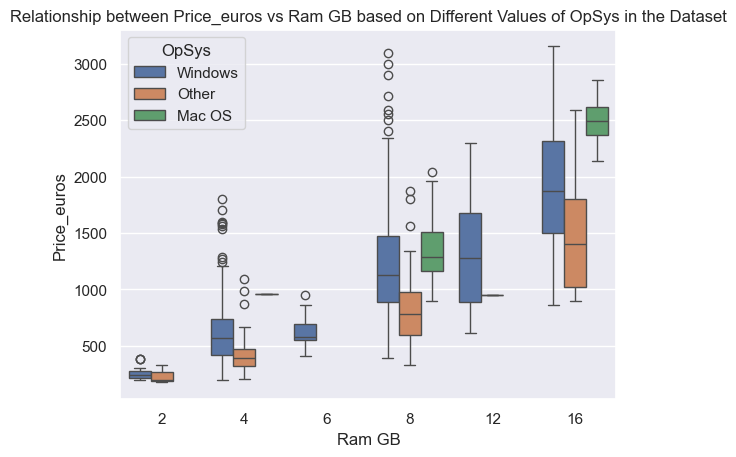

In [429]:
sns.boxplot(x='Ram GB', y='Price_euros', hue='OpSys', data=df)
plt.title('Relationship between Price_euros vs Ram GB based on Different Values of OpSys in the Dataset')
plt.show()

Overall the answer is that yes, there is an association between Price_euros and Ram GB based on different OpSys (operation systems), and we can see that based on the changes of the slopes between Mac OS and Windows--Mac OS tends to have a stronger relationship between RAM and price, while Windows shows more variability and outliers. The relationship between RAM and laptop price is positive across all operating systems, but the specifics of this relationship, including the median price, IQR, and presence of outliers, vary depending on the operating system. 

## 5. Conclusion

Overall, my research shows that the Relationship between RAM (Ram GB) and Price of a laptop (Price_euros) Changes based on Different Values of Operation Systems (OpSys) in the Dataset. The Windows OpSys has a stronger change on Price_euros and Ram GB, and we can see that interaction more clearly. However, the relationship between Price_euros and Ram GB is positive and linear for all the operation systems (Windows, Mac OS, and Other operation systems). Dropping outliers helped us see how they orginally inflated the correlation coefficient when they were present, and after these outliers were removed, our correlation coefficient got smaller. These outliers were making the relationship between Price_euros and Ram GB seem stronger than it is, and after we dropped these outliers, we can find more reliable answers. A shortcoming in my analysis is that there was significantly much more data points and a larger sample size for the Windows operation system than for Mac OS and other operations systems. A small sample size, like only 21 originally for Mac OS, is not large enough compared to the sample size of 1118 sample size for Windows. Having a larger sample size for Mac OS and other operation systems would have made our findings more reliable because we would be looking at more examples and be able to make a better generalization about the relationship between our variables. Also, another short coming is the fact that I don't know how this data was collected, and if it wasn't collected through random sampling, my analysis would likely not be very accurate. These short comings would make the software engineer the research motivation have to do more research on Mac OS because the sample size was not big enough to make a 100% confident conclusion, so knowing that could help him decide which operation system he should use along with which Ram GB amount in order to have a reasonable price for the valuable laptop he is designing. For future work, I would like to find a dataset by which each distinct value had a large enough sample size for my categorical variable, and find data that was collected by random sampling to have more accurate findings. I also want to look into how other factors, such as the weight of the laptop, are associated or not with its price. I would be interested in researching how does the Relationship between Weight (kg) of a laptop and Price of a laptop (Price_euros) Change based on Different Values of Operation Systems (OpSys) in the Dataset.